In [1]:
import cv2
import math 
import yaml
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [2]:
with open("/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/YOLO/data.yaml", "r") as file:
    config = yaml.safe_load(file)

In [3]:
import random
number=random.randint(1,7)
img = cv2.imread(f"/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/YOLO/val/{number}.png")

In [4]:
model = YOLO("yolov8n.pt")

In [5]:
classNames = config['names']


0: 640x416 1 person, 57.9ms
Speed: 2.4ms preprocess, 57.9ms inference, 589.7ms postprocess per image at shape (1, 3, 640, 416)
Confidence ---> 0.8
Class name --> Saree


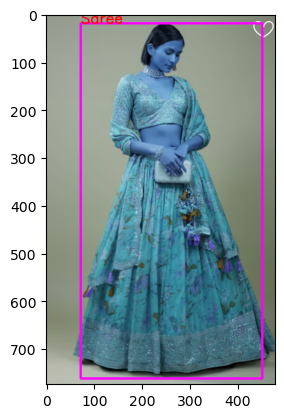

In [6]:
results = model(img)

# Coordinates
for r in results:
    boxes = r.boxes

    for box in boxes:
        # Bounding box
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # Convert to int values

        # Put box in image
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

        # Confidence
        confidence = math.ceil((box.conf[0] * 100)) / 100
        print("Confidence --->", confidence)

        # Class name
        cls = int(box.cls[0])
        class_name = classNames[cls] if 0 <= cls < len(classNames) else "Unknown"
        print("Class name -->", class_name)

        # Object details
        org = [x1, y1]
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (255, 0, 0)
        thickness = 2

        cv2.putText(img, class_name, org, font, fontScale, color, thickness)

# Display image with detections
plt.imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()